          Runs  Success %  Collision %  Timeout %  Avg nav_metric  \
env_type                                                            
Dynamic     60       0.00        55.00      45.00            0.00   
Static     300      89.67         5.67       4.67            0.43   

          Avg actual_time (s)  
env_type                       
Dynamic                 52.70  
Static                  58.77  


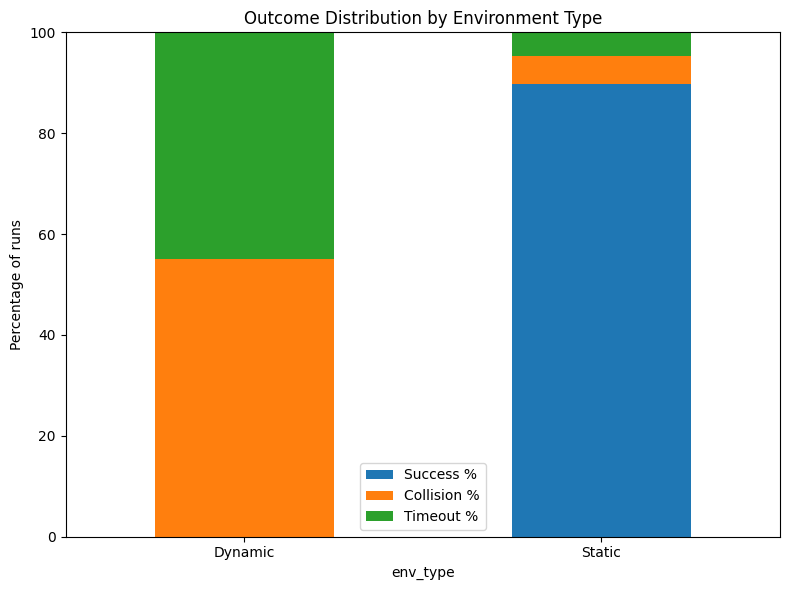

In [8]:
# Cell 1: Imports
import os
import pandas as pd
import matplotlib.pyplot as plt

# Cell 2: Locate and load results file
possible_paths = ['results/out.txt', 'out.txt']
for p in possible_paths:
    if os.path.exists(p):
        log_file = p
        break
else:
    raise FileNotFoundError(f"No log file found. Place your results in one of: {possible_paths}")

cols = ['world_idx', 'success', 'collided', 'timeout', 'actual_time', 'nav_metric']
df = pd.read_csv(log_file, sep=r'\s+', names=cols)

# Cell 3: Annotate environment type
df['env_type'] = df['world_idx'].apply(lambda i: 'Static' if i < 300 else 'Dynamic')

# Cell 4: Compute summary statistics
grouped = df.groupby('env_type')
summary = pd.DataFrame({
    'Runs':            grouped.size(),
    'Success %':       grouped['success'].mean() * 100,
    'Collision %':     grouped['collided'].mean() * 100,
    'Timeout %':       grouped['timeout'].mean() * 100,
    'Avg nav_metric':  grouped['nav_metric'].mean(),
    'Avg actual_time (s)': grouped['actual_time'].mean(),
})
print(summary.round(2))

# Cell 5: Plot stacked bar chart of outcome percentages
outcome_df = summary[['Success %', 'Collision %', 'Timeout %']]
ax = outcome_df.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6)
)
ax.set_ylabel('Percentage of runs')
ax.set_ylim(0, 100)
ax.set_title('Outcome Distribution by Environment Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

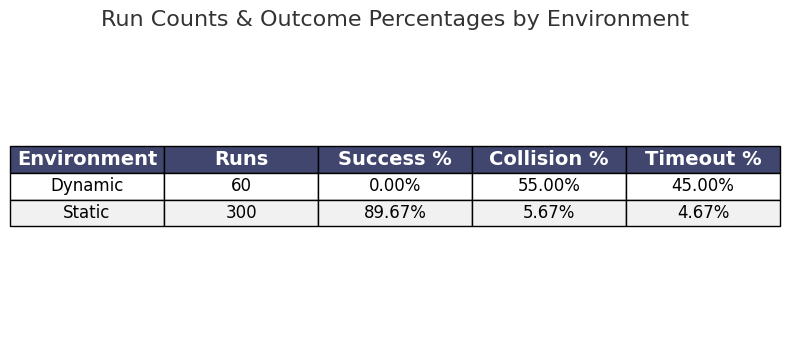

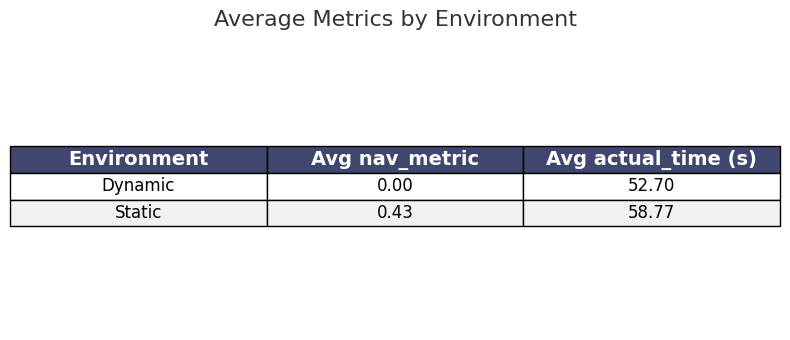

In [9]:
import os
import matplotlib.pyplot as plt

# (Optional) ensure output folder exists
os.makedirs('results', exist_ok=True)

# Split summary into two parts
table1_cols = ['Runs', 'Success %', 'Collision %', 'Timeout %']
table2_cols = ['Avg nav_metric', 'Avg actual_time (s)']

# Helper to draw a styled table
def draw_table(df, cols, title, filename):
    # Prepare data rows
    table_data = []
    for env, row in df[cols].iterrows():
        formatted = []
        for col in cols:
            val = row[col]
            if col == 'Runs':
                formatted.append(f"{int(val)}")
            elif col.endswith('%'):
                formatted.append(f"{val:.2f}%")
            else:
                formatted.append(f"{val:.2f}")
        table_data.append([env] + formatted)

    # Build column labels
    col_labels = ["Environment"] + cols

    # Figure size adapts to number of rows
    fig, ax = plt.subplots(figsize=(8, 1.5 + len(table_data)))
    ax.axis('off')

    tbl = ax.table(
        cellText=table_data,
        colLabels=col_labels,
        cellLoc='center',
        loc='center'
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1, 1.5)

    # Style header & rows
    for (r, c), cell in tbl.get_celld().items():
        if r == 0:
            cell.set_facecolor("#40466e")
            cell.set_text_props(color="w", weight="bold", fontsize=14)
        else:
            cell.set_facecolor("#f1f1f2" if r % 2 == 0 else "#ffffff")

    plt.title(title, fontsize=16, color="#333333", pad=12)
    plt.tight_layout()
    plt.savefig(f"results/{filename}", dpi=300, bbox_inches="tight")
    plt.show()


# Draw the two tables
draw_table(summary, table1_cols,
           "Run Counts & Outcome Percentages by Environment",
           "navigation_summary_part1.png")

draw_table(summary, table2_cols,
           "Average Metrics by Environment",
           "navigation_summary_part2.png")

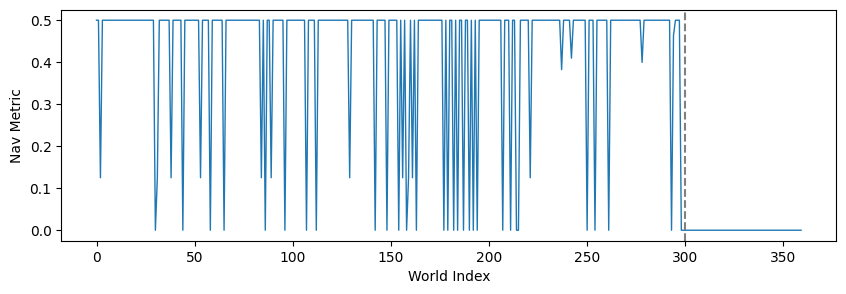

In [11]:
# 4. Line plot of nav_metric vs world_idx
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df['world_idx'], df['nav_metric'], lw=1)
ax.axvline(300, color='gray', ls='--')  # split static/dynamic
ax.set_xlabel('World Index')
ax.set_ylabel('Nav Metric')
plt.show()